## 데이터 선정 배경 및 진행 방법
사람의 특성에는 많은 것들이 있습니다. 키와 몸무게도 그 중 하나가 될 수 있는데 남성이 여성보다 평균적으로 10cm가량 크고, 몸무게도 많이 나가는 것이 보통입니다. 이에 착안하여 키와 몸무게 데이터로 성별을 얼마나 정확히 predict할 수 있는지 ML기법을 이용하여 진행하였습니다.
아직 기초적인 수준으로 inflearn강의에서 진행한 기법을 중심으로 review 해보았습니다.

### 예상 결과
모든 사람의 체중이 정상범위 값일 경우 p > 0.5, 체중이 균일분포 혹은 특정 분포를 따를 경우 p = 0.5라고 예상하였습니다. 

### Data dictionary
* Gender : Male / Female

* Height : Number (cm)

* Weight : Number (Kg)

* Index :

        0 - Extremely Weak

        1 - Weak

        2 - Normal

        3 - Overweight

        4 - Obesity

        5 - Extreme Obesity

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
dt_clf = DecisionTreeClassifier()
body_df = pd.read_csv('C:\\Users\\flowe\\OneDrive - San Francisco State University\\Project_Expert_GitHub\\Project_Python\\JupyterNotebookWorkingSpace\\PerfectGuid\\2장\\500_Person_Gender_Height_Weight_Index.csv')

In [3]:
# 정상 체중에 대해서만 진행
body_df = body_df[body_df["Index"] == 2]
body_df

,Gender,Height,Weight,Index
1,Male,189,87,2
10,Male,195,81,2
13,Male,155,51,2
14,Male,191,79,2
24,Female,172,67,2
...,...,...,...,...
472,Female,178,65,2
477,Male,167,64,2
478,Female,151,55,2
487,Male,187,80,2


In [4]:
# 남자는 1, 여자는 2로 replace
body_df['Gender'].replace('Male', 1, inplace=True)
body_df['Gender'].replace('Female', 2, inplace=True)

# target을 성별로 설정
body_target = body_df['Gender']
body_target

1      1
10     1
13     1
14     1
24     2
      ..
472    2
477    1
478    2
487    1
490    2
Name: Gender, Length: 69, dtype: int64

In [5]:
# data로 키와 몸무게를 받아옴
body_data = body_df[["Height", "Weight"]]
body_data

,Height,Weight
1,189,87
10,195,81
13,155,51
14,191,79
24,172,67
...,...,...
472,178,65
477,167,64
478,151,55
487,187,80


** 정상체중 남녀의 키와 몸무게에 대한 데이터 개요 **

In [6]:
M = body_df[body_df["Gender"] == 1].count()[0]
F = body_df[body_df["Gender"] == 2].count()[0]
print("남자 {0}명, 여자 {1}명의 데이터".format(M, F))

남자 28명, 여자 41명의 데이터


In [7]:
M_m_h = body_df[body_df["Gender"] == 1]["Height"].mean()
M_sd_h = body_df[body_df["Gender"] == 1]["Height"].std()
print("전체 남자 키 평균 : {0:.2f}, 전체 남자 키 표준편차 : {1:.2f}".format(M_m_h, M_sd_h))
M_m_w = body_df[body_df["Gender"] == 1]["Weight"].mean()
M_sd_w = body_df[body_df["Gender"] == 1]["Weight"].std()
print("전체 남자 체중 평균 : {0:.2f}, 전체 남자 체중 표준편차 : {1:.2f}".format(M_m_w, M_sd_w))

전체 남자 키 평균 : 178.04, 전체 남자 키 표준편차 : 13.59
전체 남자 체중 평균 : 72.25, 전체 남자 체중 표준편차 : 11.80


In [8]:
F_m_h = body_df[body_df["Gender"] == 2]["Height"].mean()
F_sd_h = body_df[body_df["Gender"] == 2]["Height"].std()
print("전체 여자 키 평균 : {0:.2f}, 전체 키 표준편차 : {1:.2f}".format(F_m_h, F_sd_h))
F_m_w = body_df[body_df["Gender"] == 2]["Weight"].mean()
F_sd_w = body_df[body_df["Gender"] == 2]["Weight"].std()
print("전체 체중 평균 : {0:.2f}, 전체 체중 표준편차 : {1:.2f}".format(F_m_w, F_sd_w))

전체 여자 키 평균 : 171.68, 전체 키 표준편차 : 13.48
전체 체중 평균 : 66.93, 전체 체중 표준편차 : 11.90


<AxesSubplot:xlabel='Height'>

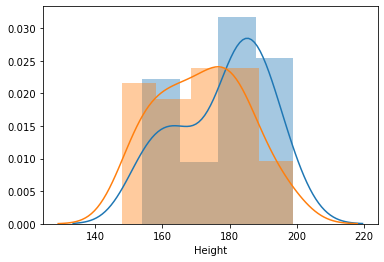

In [9]:
import seaborn as sns
# 전체 남녀 키의 분포도 비교
sns.distplot(body_df[body_df["Gender"] == 1]["Height"])
sns.distplot(body_df[body_df["Gender"] == 2]["Height"])

<AxesSubplot:xlabel='Weight'>

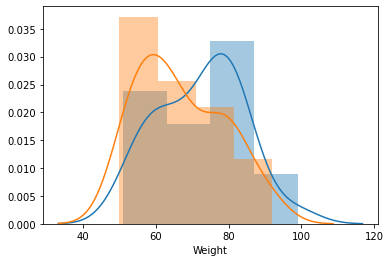

In [10]:
# 전체 남녀 체중의 분포도 비교
sns.distplot(body_df[body_df["Gender"] == 1]["Weight"])
sns.distplot(body_df[body_df["Gender"] == 2]["Weight"])

* train set과 test set을 나누어 적합

In [11]:
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, test_size=0.2, random_state=11)

In [12]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [13]:
# X_test로 의사결정트리 진행하여 pred의 그 결과 값 저장
pred = dt_clf.predict(X_test)

In [14]:
print(len(X_test))
print(X_test)

14
     Height  Weight
472     178      65
477     167      64
183     180      73
73      180      75
67      168      59
296     169      88
241     166      61
325     148      54
402     182      70
13      155      51
277     190      80
406     186      68
349     157      60
373     163      63


In [15]:
pred

array([2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int64)

In [16]:
# 예상과 비슷하게 0.5 정도의 예측 정확도를 나타냄
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.4286


* k fold 검정 실시

In [17]:
# kfold 검정
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

features = body_data.to_numpy()
label = body_target.to_numpy()
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('바디 데이터 세트 크기:',features.shape[0])

바디 데이터 세트 크기: 69


In [18]:
X_train, X_test = features[train_index], features[test_index]
y_train, y_test = label[train_index], label[test_index]
# pd.DataFrame(kfold.split(features))[0]

NameError: name 'train_index' is not defined

In [19]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.5, 학습 데이터 크기: 55, 검증 데이터 크기: 14
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]

#2 교차 검증 정확도 :0.6429, 학습 데이터 크기: 55, 검증 데이터 크기: 14
#2 검증 세트 인덱스:[14 15 16 17 18 19 20 21 22 23 24 25 26 27]

#3 교차 검증 정확도 :0.5714, 학습 데이터 크기: 55, 검증 데이터 크기: 14
#3 검증 세트 인덱스:[28 29 30 31 32 33 34 35 36 37 38 39 40 41]

#4 교차 검증 정확도 :0.5, 학습 데이터 크기: 55, 검증 데이터 크기: 14
#4 검증 세트 인덱스:[42 43 44 45 46 47 48 49 50 51 52 53 54 55]

#5 교차 검증 정확도 :0.4615, 학습 데이터 크기: 56, 검증 데이터 크기: 13
#5 검증 세트 인덱스:[56 57 58 59 60 61 62 63 64 65 66 67 68]

## 평균 검증 정확도: 0.5351600000000001


* stratified K 검정

In [20]:
import pandas as pd

body_df = pd.DataFrame(data=body_data, columns=list(body_df))
print(body_df)
body_df['label']=body_target
body_df['label'].value_counts()

Gender  Height  Weight  Index
1       NaN     189      87    NaN
10      NaN     195      81    NaN
13      NaN     155      51    NaN
14      NaN     191      79    NaN
24      NaN     172      67    NaN
..      ...     ...     ...    ...
472     NaN     178      65    NaN
477     NaN     167      64    NaN
478     NaN     151      55    NaN
487     NaN     187      80    NaN
490     NaN     164      59    NaN

[69 rows x 4 columns]


2    41
1    28
Name: label, dtype: int64

In [21]:
kfold = KFold(n_splits=3)
n_iter =0
for train_index, test_index  in kfold.split(body_df):
    n_iter += 1
    label_train= body_df['label'].iloc[train_index]
    label_test= body_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print()
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    31
1    15
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    13
2    10
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 2    26
1    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    15
1     8
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 2    25
1    21
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    16
1     7
Name: label, dtype: int64



In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(body_df, body_df['label']):
    n_iter += 1
    label_train= body_df['label'].iloc[train_index]
    label_test= body_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print()

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    28
1    18
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    13
1    10
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 2    27
1    19
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    14
1     9
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 2    27
1    19
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    14
1     9
Name: label, dtype: int64



In [23]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.5217, 학습 데이터 크기: 46, 검증 데이터 크기: 23
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 23 24 25]

#2 교차 검증 정확도 :0.5217, 학습 데이터 크기: 46, 검증 데이터 크기: 23
#2 검증 세트 인덱스:[18 20 22 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 46 47]

#3 교차 검증 정확도 :0.5217, 학습 데이터 크기: 46, 검증 데이터 크기: 23
#3 검증 세트 인덱스:[44 45 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]

## 교차 검증별 정확도: [0.5217 0.5217 0.5217]
## 평균 검증 정확도: 0.5217


* cross_val_score()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=156)

data = body_data
label = body_target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.4286 0.5714 0.5714 0.5    0.4615]
평균 검증 정확도: 0.5066


* GridSearchCV

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}

In [26]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.565302,3,0.473684,0.611111,0.611111
1,"{'max_depth': 1, 'min_samples_split': 3}",0.547758,6,0.421053,0.611111,0.611111
2,"{'max_depth': 2, 'min_samples_split': 2}",0.582846,2,0.526316,0.555556,0.666667
3,"{'max_depth': 2, 'min_samples_split': 3}",0.619883,1,0.526316,0.666667,0.666667
4,"{'max_depth': 3, 'min_samples_split': 2}",0.563353,4,0.578947,0.555556,0.555556
5,"{'max_depth': 3, 'min_samples_split': 3}",0.563353,4,0.578947,0.555556,0.555556


In [27]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00431951, 0.00332411, 0.00398938, 0.00299215, 0.00298675,
        0.00332411]),
 'std_fit_time': array([9.38921028e-04, 4.69965469e-04, 1.25153985e-06, 8.14393545e-04,
        8.14512504e-04, 4.68787328e-04]),
 'mean_score_time': array([0.00365702, 0.00299303, 0.0019966 , 0.00266004, 0.00299199,
        0.00199366]),
 'std_score_time': array([1.24481358e-03, 8.15464070e-04, 8.15180244e-04, 4.69684520e-04,
        8.14101767e-04, 2.43140197e-06]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [28]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 2, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.6199
테스트 데이터 세트 정확도: 0.4286


In [29]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.4286
